In [16]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model

In [17]:
import random
random_index = random.randint(0, 100)
image_path = f"IMAGES/{random_index:03}.png"
mask_path = f"IMAGES/{random_index:03}mask.png"
img = Image.open(image_path)
mask = Image.open(mask_path)
img_small = img.resize((256, 256))
np_img = np.array(img_small)
np_img = np_img / 255.0
np_img = np.expand_dims(np_img, axis=0)
model = load_model("unet_football.h5")
prediction = model.predict(np_img)[0]

1/1 [==============================] - 0s 305ms/step


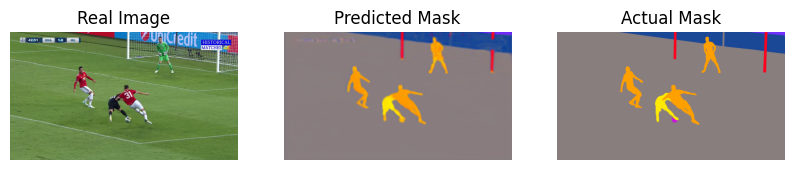

In [18]:
prediction_img = Image.fromarray((prediction * 255).astype(np.uint8))
prediction_img = prediction_img.resize((1920, 1080))
fig, axes = plt.subplots(1, 3, figsize=(10, 5))
axes[0].imshow(img)
axes[0].set_title('Real Image')
axes[0].axis('off')
axes[1].imshow(prediction_img, cmap='gray')
axes[1].set_title('Predicted Mask')
axes[1].axis('off')
axes[2].imshow(mask, cmap='gray')
axes[2].set_title('Actual Mask')
axes[2].axis('off')
plt.show()

1/1 [==============================] - 0s 172ms/step


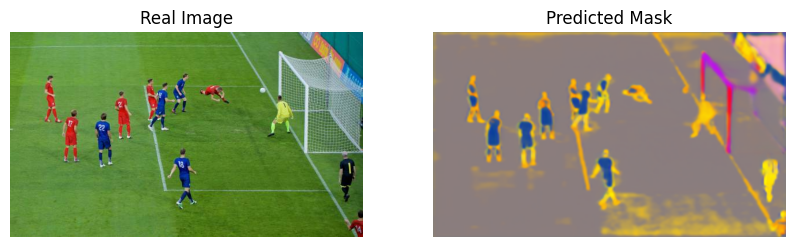

In [20]:
image_path = f"sample.jpg"
img = Image.open(image_path)
w, h = img.size
img_small = img.resize((256, 256))
np_img = np.array(img_small)
np_img = np_img / 255.0
np_img = np.expand_dims(np_img, axis=0)
prediction = model.predict(np_img)[0]
prediction_img = Image.fromarray((prediction * 255).astype(np.uint8))
prediction_img = prediction_img.resize((w, h))
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(img)
axes[0].set_title('Real Image')
axes[0].axis('off')
axes[1].imshow(prediction_img)
axes[1].set_title('Predicted Mask')
axes[1].axis('off')
plt.show()
# bit off since the dataset is small, so only works with black and red jerseys, and the angles are different here